In [1]:
#importing packages
import numpy as np
from numpy import random as rnd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from tqdm.notebook import tqdm

# plot options
rc = {"text.usetex": True,
      "font.family": "serif",
      "font.sans-serif": ["Computer Modern"]
     }
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

  0%|          | 0/1000000 [00:00<?, ?it/s]

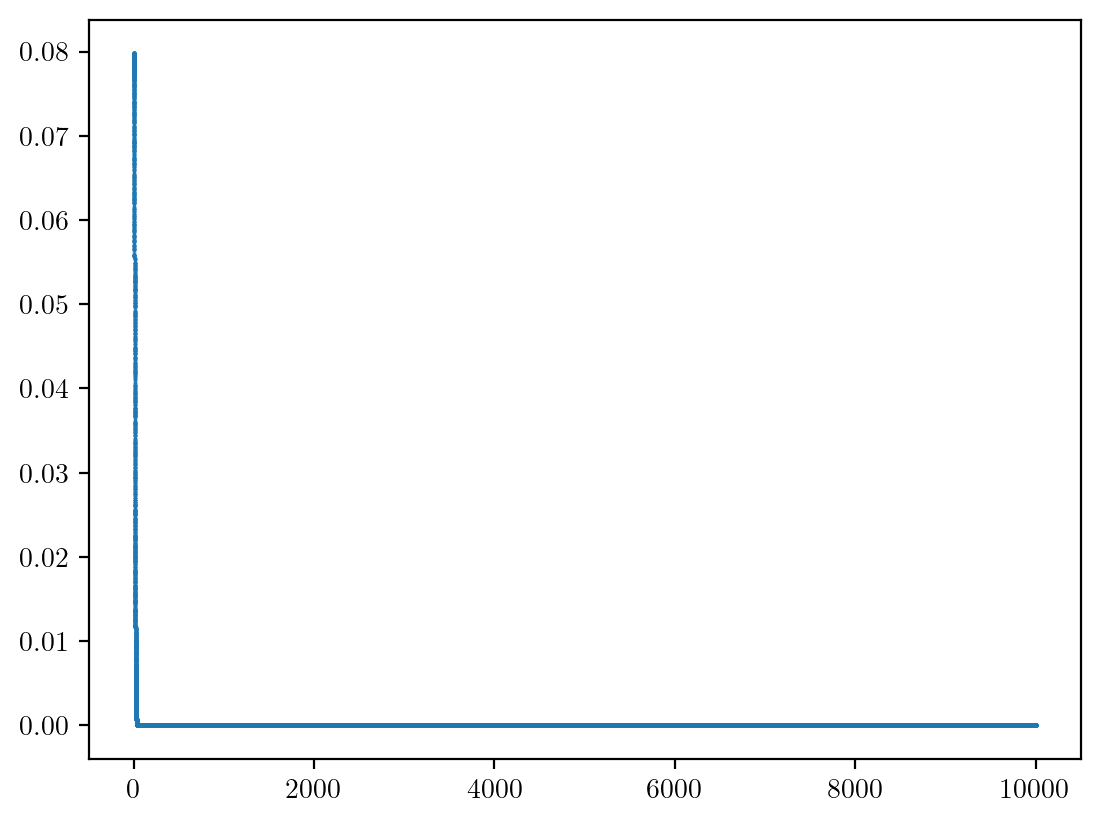

In [44]:
def halfgaus(x, mu,sigma):
    return 2*norm(mu, sigma).pdf(x)

sigma = 10
u_i = np.array([rnd.uniform(0,int(1e4)) for i in tqdm(range(int(1e6)))])
x_i = halfgaus(u_i, 0, sigma)

plt.scatter(u_i, x_i , s = .1);

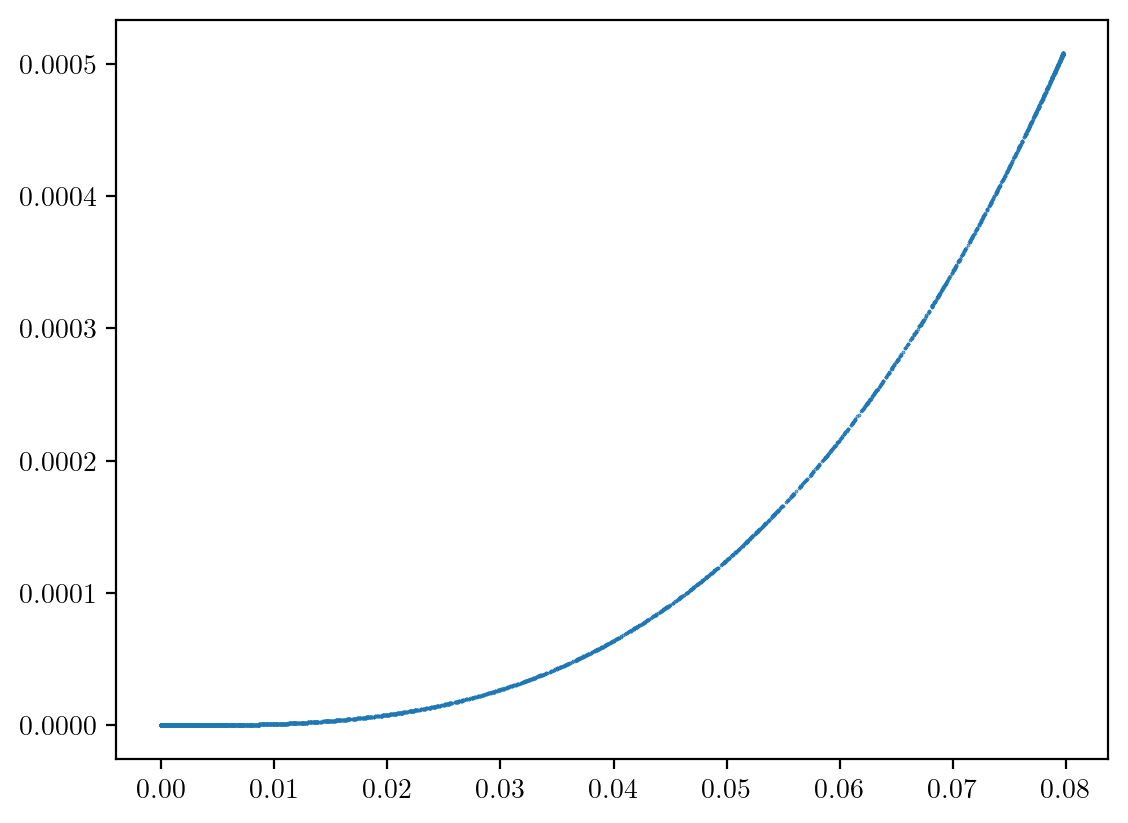

In [48]:
def f(x):
    return x**3

plt.scatter(x_i, f(x_i) , s = .1);

In [49]:
integral = np.mean(f(x_i)) * (sigma*(2*np.pi)**1/2)/2
print(integral)
print(2*sigma**4)

5.500248557779808e-06
20000


### This won't work
The reason is because you can't create a number of uniformly distributed numbers because they will be evenly distributed on the gaussian function, we want a completely different thing. We want to generate data which is gaussianly **distributed** meaning their density is not equal on all plane.<br>
What we actually have to do is:

In [1]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from tqdm.notebook import tqdm

# plot options
rc = {"text.usetex": True,
      "font.family": "serif",
      "font.sans-serif": ["Computer Modern"]
     }
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

### Computing monte carlo and plotting the error (distance from the true value) for different data sizes

In [90]:
def f(x):
    return x**3


n = np.arange(1,int(1e4), 1)
err = np.empty(len(n))
sigma = 10


for i in tqdm(range(0, len(n))):
    x = abs(np.random.normal(0, sigma, n[i]))
    integral = np.mean(f(x))*(2*np.pi)**0.5*sigma/2
    err[i] = abs(integral - 2*sigma**4)
    #print(f"{round(integral) : <10} {2*sigma**4 : <10} {round(err,2)}")

  0%|          | 0/9999 [00:00<?, ?it/s]

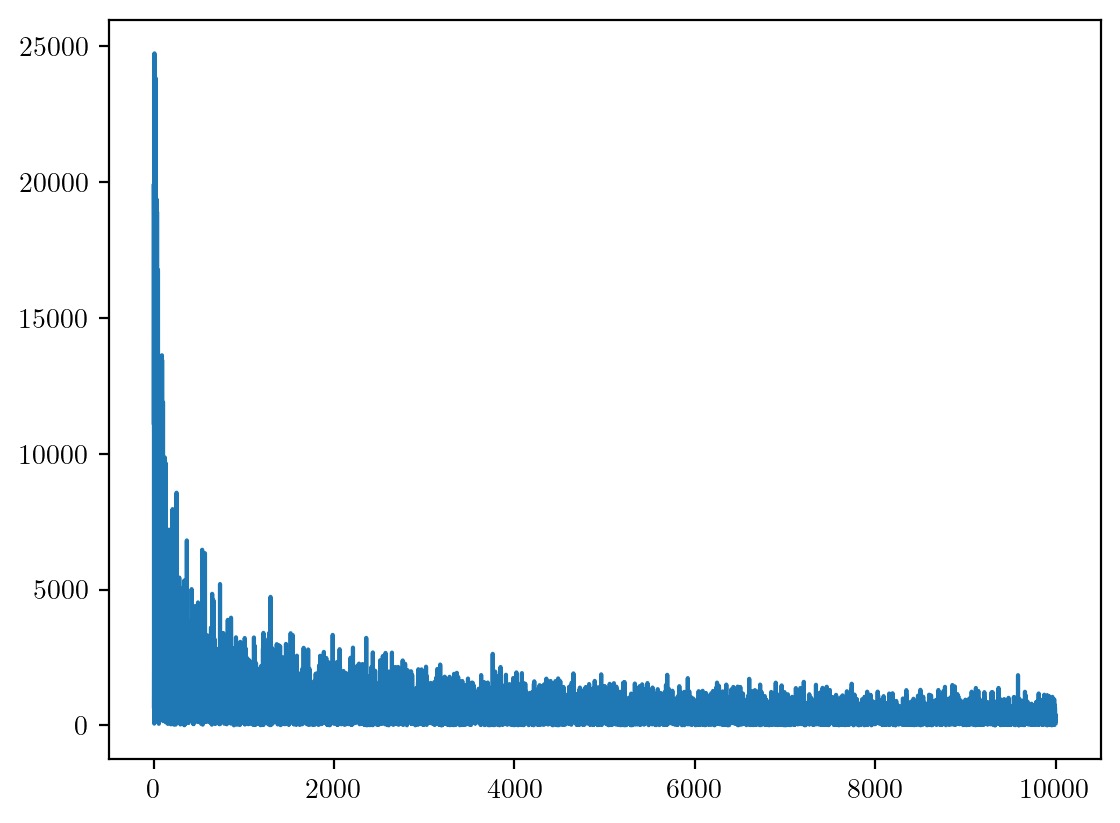

In [91]:
fig, ax = plt.subplots()
ax.plot(n, err);

### Plotting the distribution of the montecarlo estimates for a given data size
For 100 points

In [109]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import scipy.optimize as opt
from tqdm.notebook import tqdm
from numpy import random as rnd

# plot options
rc = {"text.usetex": True,
      "font.family": "serif",
      "font.sans-serif": ["Computer Modern"]
     }
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [94]:
def f(x):
    return x**3


sigma = 10

s = int(1e5)
integral = np.empty(s)

for i in tqdm(range(0, s)):
    x = abs(np.random.normal(0, sigma, int(1e3)))
    integral[i] = np.mean(f(x))*(2*np.pi)**0.5*sigma/2


  0%|          | 0/100000 [00:00<?, ?it/s]

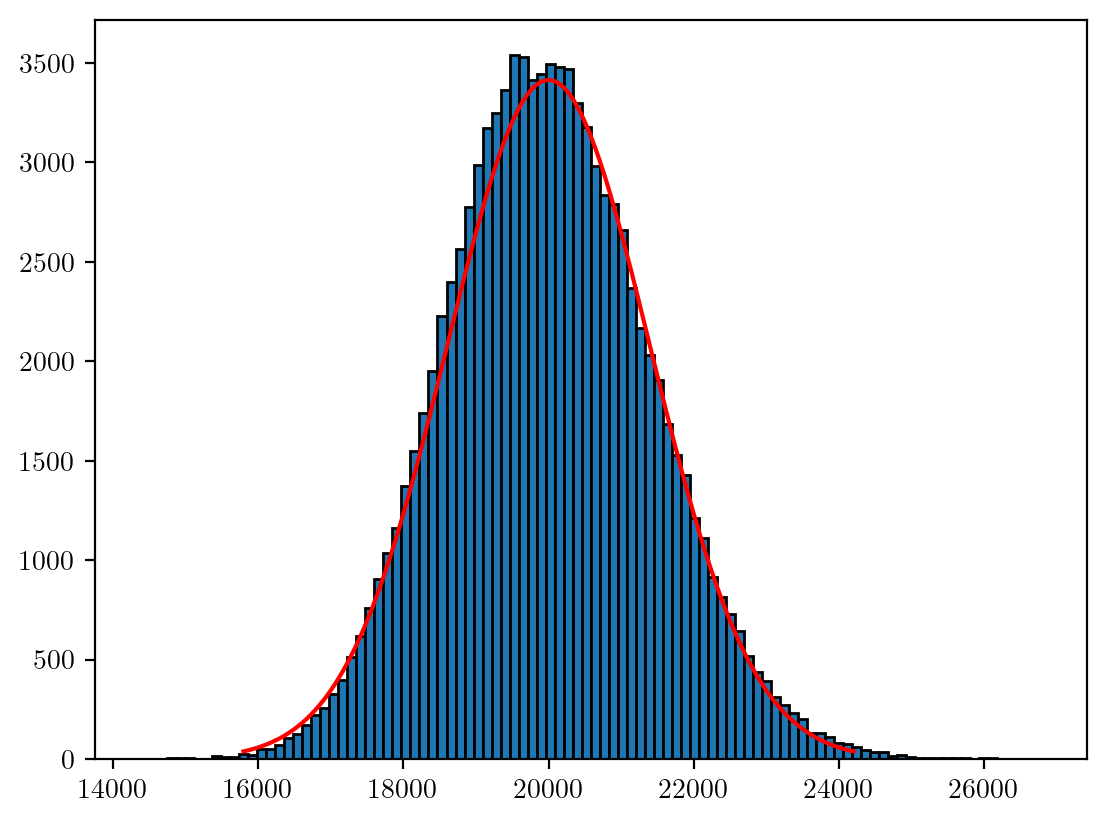

In [136]:
true = 2*sigma**4
est_sigma = np.std(integral)

plt.hist(integral, bins = 100, edgecolor='black')
x = np.linspace(true - 3*est_sigma, true + 3*est_sigma, len(integral))

#param, cov = opt.curve_fit(Gauss, x, integral)
#print(param)
model = stat.norm(true, est_sigma)
A = int(1.2e7)

plt.plot(x, A*model.pdf(x), c = 'r');

For 10 points, this is just a poisson distribution

In [138]:
def f(x):
    return x**3


sigma = 10

s = int(1e5)
integral = np.empty(s)

for i in tqdm(range(0, s)):
    x = abs(np.random.normal(0, sigma, int(10)))
    integral[i] = np.mean(f(x))*(2*np.pi)**0.5*sigma/2

  0%|          | 0/100000 [00:00<?, ?it/s]

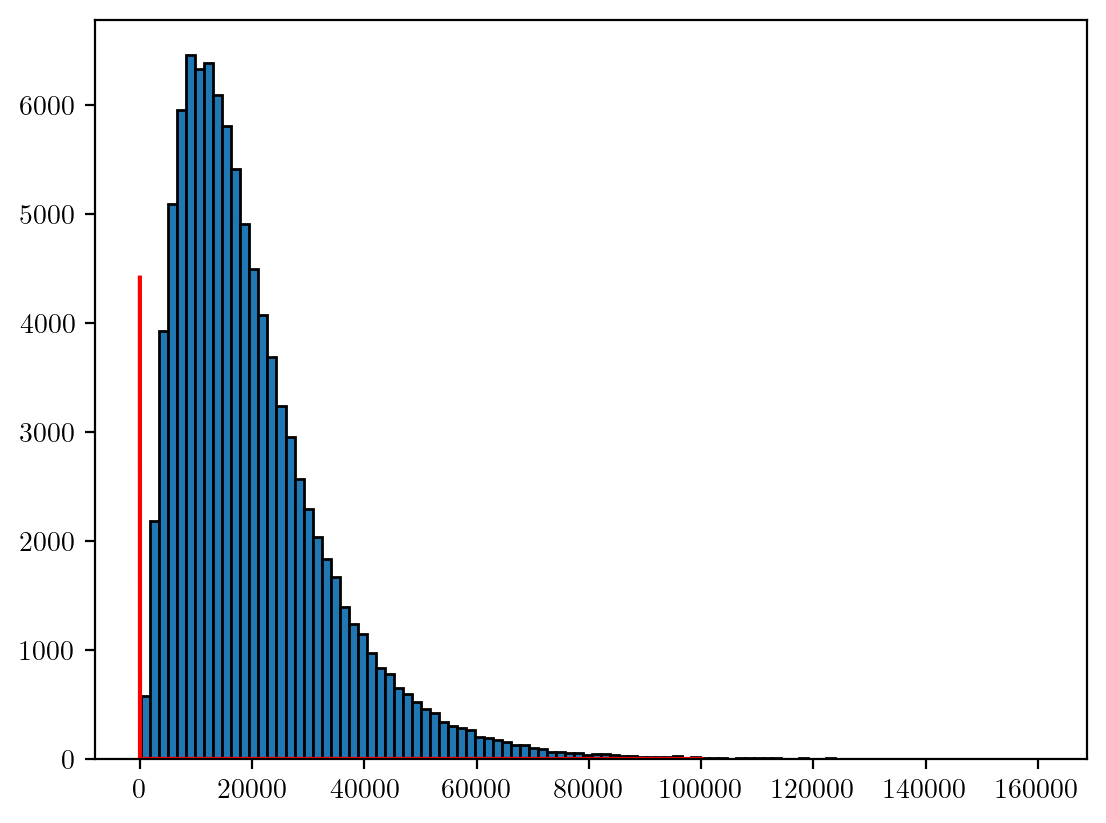

In [179]:
plt.hist(integral, bins = 100, edgecolor='black')

model = stat.poisson(1)
A = int(1.2e4)

x = np.linspace(0, int(1e5), len(integral))

plt.plot(x, A*model.pmf(x), c = 'r');

For three points

  0%|          | 0/100000 [00:00<?, ?it/s]

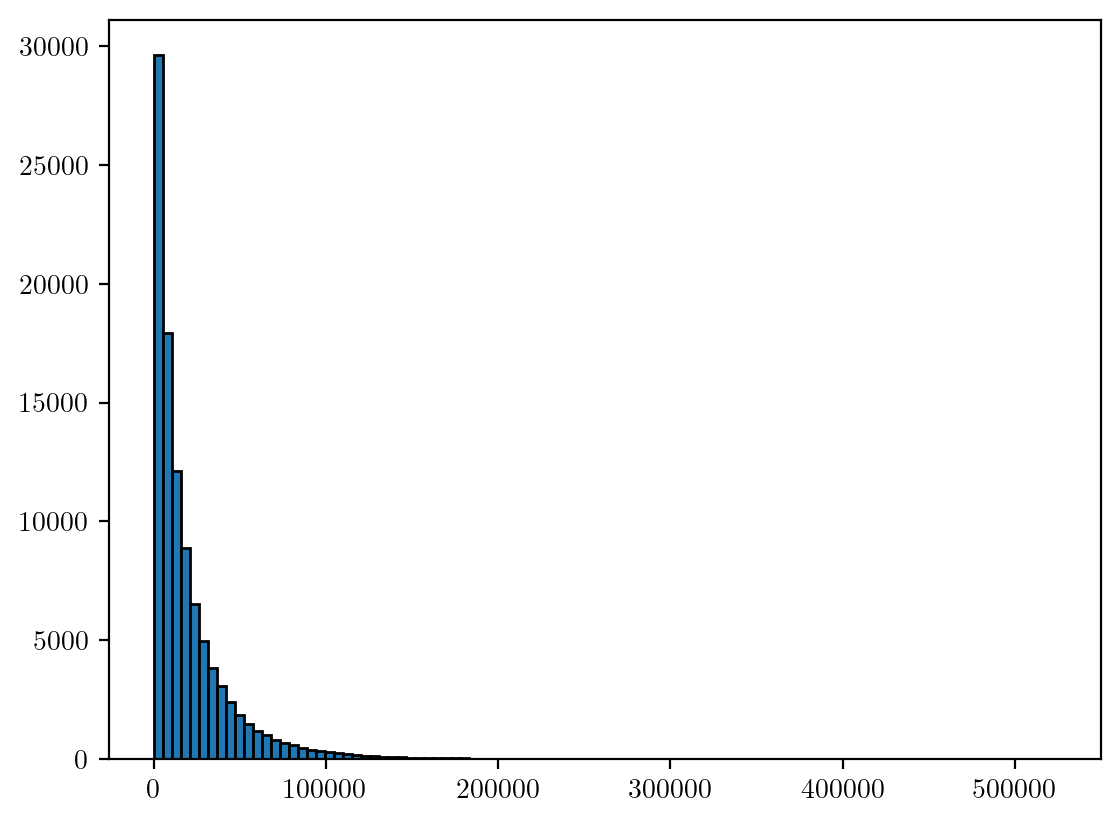

In [73]:
def f(x):
    return x**3


sigma = 10

s = int(1e5)
integral = np.empty(s)

for i in tqdm(range(0, s)):
    x = abs(np.random.normal(0, sigma, 3))
    integral[i] = np.mean(f(x))*(2*np.pi)**0.5*sigma/2
    

plt.hist(integral, bins = 100, edgecolor='black');